# Module 4 - Grids and biases in localization

In [1]:
import matplotlib.pyplot as plt
import imageio as img
import numpy as np
import skimage.filters as filters #for different thresholding algorithms
import seaborn as sns; sns.set_style('white'); sns.set_context('notebook')
import image_analysis as anl

In [2]:
figfile = "Processed/"

## 3x3 image and the coordinate system for images in Python

In [3]:
im = np.array([[0,0,0],[0,1,0],[0,0,0]])

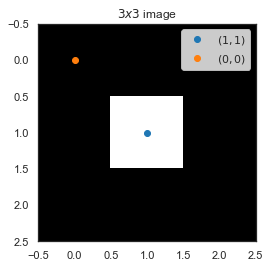

In [4]:
plt.imshow(im, cmap = 'gray')
plt.plot(1,1,'o')
plt.plot(0,0,'o')
plt.legend(['$(1,1)$','$(0,0)$'])
plt.title('$3x3$ image');
plt.savefig(figfile+"3x3_grid", dpi = 300);

In [5]:
Xcom,Ycom = anl.COM(im)
print(Xcom,Ycom)

1.0 1.0


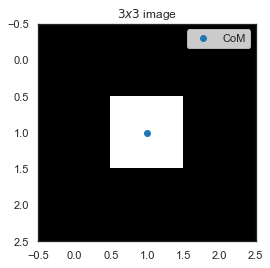

In [6]:
plt.imshow(im, cmap = 'gray')
plt.plot(Xcom,Ycom,'o')
plt.legend(['CoM'])
plt.title('$3x3$ image');
plt.savefig(figfile+"x3_grid_CoM", dpi = 300);

## Centred Point Source without Background Noise

In [7]:
pic = np.zeros([1001,1001]); pic[500,500] = 255

In [8]:
scale_true = 10 #in nm/pixel
lam = 530 #in nm
ccd_scale = 100 #in nm/pixel
SNr = 100
bkg = 0

### CoM of a centred point source compared to its true location.

In [9]:
N = 100
Xcom = np.zeros(N); Ycom = np.zeros(N)
for i in range(N):
    simulated = anl.simulator(pic,scale_true,lam,ccd_scale,SNr,bkg)
    Xcom[i],Ycom[i] = anl.COM(simulated)

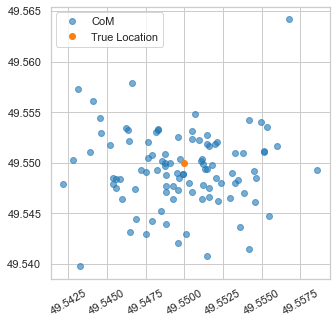

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (5,5))
plt.plot(Xcom,Ycom,'o',alpha = 0.6)
Xtrue,Ytrue = anl.transform_ccd_coords(pic,scale_true,ccd_scale,500,500)
plt.plot(Xtrue,Ytrue,'o')
plt.legend(['CoM','True Location'])
plt.xticks(rotation=30)
plt.savefig(figfile+"CoM_vs_true_location_centred.png", dpi = 300); sns.set_style("white")

### Gaussian Centre of a centred point source compared to its true location.

In [11]:
N = 100
Xg = np.zeros(N); Yg = np.zeros(N)
for i in range(N):
    simulated = anl.simulator(pic,scale_true,lam,ccd_scale,SNr,bkg)
    _,Xg[i],Yg[i],_,_,_ = anl.gauss2_fit_MLE(simulated,suppress = True)

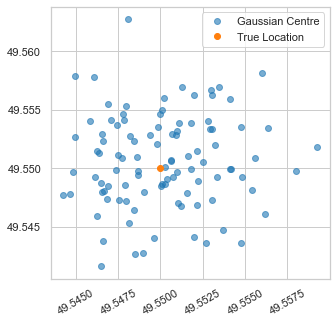

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize = (5,5))
plt.plot(Xg,Yg,'o',alpha = 0.6)
Xtrue,Ytrue = anl.transform_ccd_coords(pic,scale_true,ccd_scale,500,500)
plt.plot(Xtrue,Ytrue,'o')
plt.legend(["Gaussian Centre","True Location"])
plt.xticks(rotation=30)
plt.savefig(figfile+"gaussian_centre_vs_true_location_centred.png", dpi = 300); sns.set_style("white")